## Logistic Regression

Logistic Regression은 이진 분류를 풀기 위한 대표적인 알고리즘이다.

#### 1. 이진 분류

학생 시험 성적에 따라 합격, 불합격이 기재된 데이터가 있고, 이 시험의 커트라인이 공개되지 않았는데, 이 데이터로부터 특정 점수를 얻었을 때 합격, 불합격 여부를 판정하는 모델을 만든다 하자

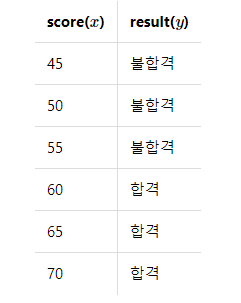

이를 그래프로 그려보면 다음과 같다.

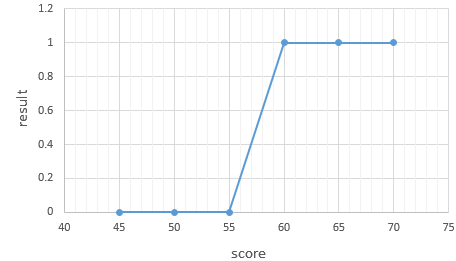

이러한 x와 y의 관계를 표현하기 위해서는 Wx+b와 같은 직선 함수가 아닌 S자 형태를 표현할 함수가 필요하다.   
즉, y = f(Wx+b)를 사용할 것이다.   
그리고 이 S자 모양의 그래프를 그려줄 함수는 바로 Sigmoid 함수이다.

#### 2. Sigmoid function

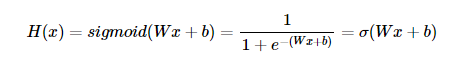

matplotlib를 사용하여 시각화를 해보자

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

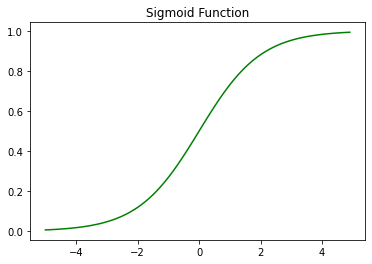

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.title('Sigmoid Function')
plt.show()

##### W에 따른 경사도의 변화

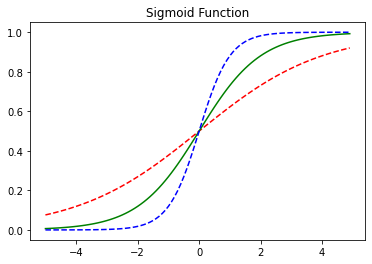

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.title('Sigmoid Function')
plt.show()

- W의 값이 작아지면 경사가 작이지는 것을 확인할 수 있다.

#### 3. 비용 함수 (Cost function)

선형 회귀에서 배운 MSE를 로지스틱 회귀의 cost function으로 사용하면 어떻게 될까?

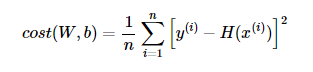

이 cost function을 미분하면 다음과 같은 형태의 그래프가 나온다.

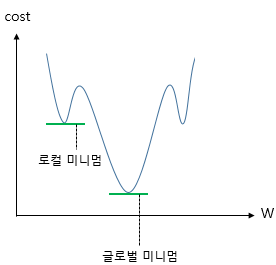

sigmoid function의 특징은 출력값이 0과 1 사이라는 것이다. 즉, 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야하고, 실제값이 0일 때 예측값이 1에 가까워져도 오차가 커져야한다.   
이를 충족하는 함수가 바로 log 함수이다.

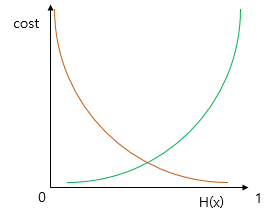

실제값이 1일 때의 그래프를 주황색 선, 0일 때의 그래프를 초록색 선으로 표현한 것이다.

이 두 개의 log 함수를 식으로 표현하면

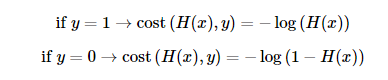

이 두 식을 하나의 식으로 통합할 수 있다.

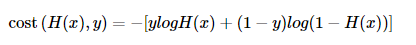

왜 이 식을 위의 두 식을 통합한 식이라고 볼 수 있냐면, 실제값 y가 1이라면 덧셈 기호를 기준으로 우측의 항이 없어지고, 실제값 y가 0이라면 덧셈 기호를 기준으로 좌측의 항이 없어져서이다.

### 4. PyTorch로 Logistic Regression 구현하기

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
torch.manual_seed(1)

In [7]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [8]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [9]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [12]:
# 가설식 (softmax)
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [13]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


PyTorch에서 sigmoid function을 이미 구현하여 제공하고 있어서 더 간단하게 표현할 수도 있다.

In [14]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [15]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


6개의 data에 대해 하나의 샘플에 대해서만 오차를 구해보자

In [16]:
-((y_train[0] * torch.log(hypothesis[0])) + ((1 - y_train[0]) * torch.log(1 - hypothesis[0])))

tensor([0.6931], grad_fn=<NegBackward0>)

이제 모든 원소에 대해 오차를 구해보자

In [19]:
losses = -((y_train * torch.log(hypothesis)) + ((1 - y_train) * torch.log(1 - hypothesis)))
losses

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)

이제 평균을 구하면 된다.

In [20]:
cost = losses.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

이 cost function 또한 PyTorch에 구현되어 있다.

In [22]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

동일하게 출력된다!! 이제 이를 이용해서 전체적으로 학습을 해보자

In [23]:
W = torch.zeros((2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr=1)

EPOCH = 1000

for epoch in range(EPOCH + 1):
    
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    
    cost = -((y_train * torch.log(hypothesis)) + ((1-y_train) * torch.log(1-hypothesis))).mean()
    #cost = F.binary_cross_entropy(hypothesis, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{}, Cost : {:.6f}'.format(epoch, EPOCH, cost.item()))

Epoch    0/1000, Cost : 0.693147
Epoch  100/1000, Cost : 0.134722
Epoch  200/1000, Cost : 0.080643
Epoch  300/1000, Cost : 0.057900
Epoch  400/1000, Cost : 0.045300
Epoch  500/1000, Cost : 0.037261
Epoch  600/1000, Cost : 0.031673
Epoch  700/1000, Cost : 0.027556
Epoch  800/1000, Cost : 0.024394
Epoch  900/1000, Cost : 0.021888
Epoch 1000/1000, Cost : 0.019852


학습이 끝났으니 제대로 예측했나 확인을 해야한다.

In [24]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


위의 값들은 0과 1 사이의 값을 가지고 있다. 0.5를 넘으면 True, 아니면 False로 출력하도록 해보자

In [25]:
pred = hypothesis >= torch.FloatTensor([0.5])
print(pred)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


동일하게 예측한 것을 확인할 수 있다. 훈련된 후의 W와 b의 값을 확인해보자

In [26]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
